<a href="https://colab.research.google.com/github/Storm00212/Data-manipulation-using-python/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [12]:
Temp=[110,120,130,140,150,160,170]
Yield=[2.1, 4.3, 3.1, 3.4, 2.9, 5.5, 2.3]
df= pd.DataFrame({'Temp':Temp, 'Yield':Yield})
df.head()

,Temp,Yield
0,110,2.1
1,120,4.3
2,130,3.1
3,140,3.4
4,150,2.9


Text(0, 0.5, 'Yield')

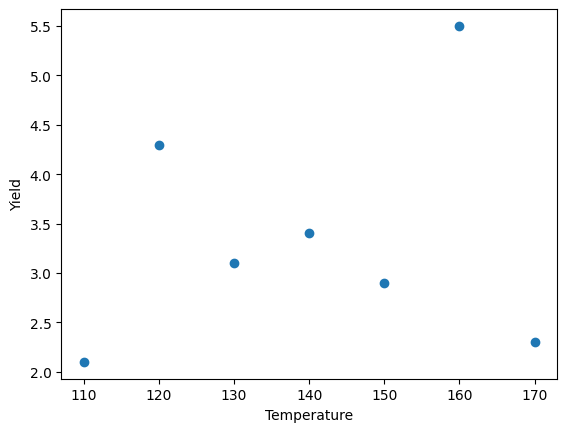

In [13]:
plt.scatter(df['Temp'], df['Yield'])
plt.xlabel('Temperature')
plt.ylabel('Yield')

In [45]:
# regression
x = df['Temp']
y = df['Yield']
xy= df['Temp']*df['Yield']
x2= df['Temp']**2
n=len(df)
df2= pd.DataFrame({'x':x, 'y':y, 'xy':xy, 'x2':x2})
df2.head()



,x,y,xy,x2
0,110,2.1,231.0,12100
1,120,4.3,516.0,14400
2,130,3.1,403.0,16900
3,140,3.4,476.0,19600
4,150,2.9,435.0,22500


In [47]:
import numpy as np

sum_x  = np.sum(df2['x'])
sum_y  = np.sum(df2['y'])
sum_xy = np.sum(df2['xy'])   # <- this must be sum of x*y
sum_x2 = np.sum(df2['x2'])

n = len(df2)

# correct slope (b)
b = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)

# correct intercept (a)
x_mean = sum_x / n
y_mean = sum_y / n
a = y_mean - b * x_mean

print("slope b =", b)
print("intercept a =", a)


slope b = 0.01
intercept a = 1.9714285714285713


In [48]:
df2['Predicted Yield'] = a + b*df2['x']
df2.head()

,x,y,xy,x2,Predicted Yield
0,110,2.1,231.0,12100,3.071429
1,120,4.3,516.0,14400,3.171429
2,130,3.1,403.0,16900,3.271429
3,140,3.4,476.0,19600,3.371429
4,150,2.9,435.0,22500,3.471429


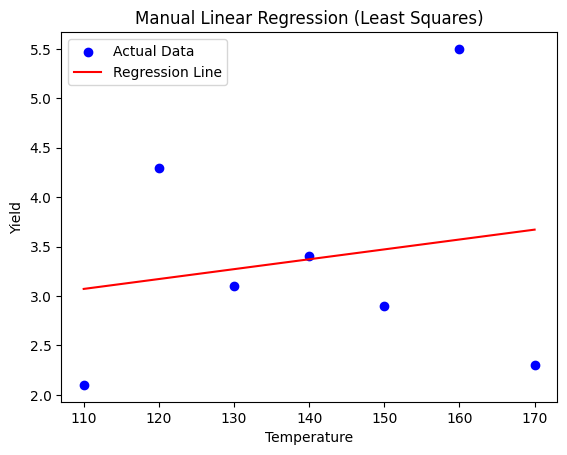

In [49]:
plt.scatter(df['Temp'], df['Yield'], color='blue', label='Actual Data')
plt.plot(df['Temp'], df2['Predicted Yield'], color='red', label='Regression Line')
plt.xlabel('Temperature')
plt.ylabel('Yield')
plt.title('Manual Linear Regression (Least Squares)')
plt.legend()
plt.show()

In [18]:
# Using the example given in class.

x = [11, 13, 14, 16, 18, 19, 21, 24]
y = [11, 12, 14, 14, 15, 17, 18, 19]

df3= pd.DataFrame({'x': x, 'y': y})
df3.head()

,x,y
0,11,11
1,13,12
2,14,14
3,16,14
4,18,15


In [19]:
xy = df3['x']*df3['y']
x2 = df3['x']**2

df3['xy'] = xy
df3['x2'] = x2
df3.head()

,x,y,xy,x2
0,11,11,121,121
1,13,12,156,169
2,14,14,196,196
3,16,14,224,256
4,18,15,270,324


In [32]:
sum_x = np.sum(df3['x'])
sum_y =np.sum(df3['y'])
sum_xy =np.sum(df3['xy'])
sum_x2 =np.sum(df3['x2'])

print(f'Sum of X:',sum_x)
print(f'Sum of Y:',sum_y)
print(f'Sum of XY:',sum_xy)
print(f'Sum of X squared:',sum_x2)
n = len(df3)
print(f'Frequency:',n)
y_mean = sum_y/n
print('Mean of Y:',y_mean)
x_mean = sum_x/n
print(f'Mean of X:',x_mean)

b = (n*sum_xy - sum_x*sum_y) / (n*sum_x2 - sum_x**2)
a = y_mean - b*x_mean

print(f'b',b)
print(f'a',a)

Sum of X: 136
Sum of Y: 120
Sum of XY: 2124
Sum of X squared: 2444
Frequency: 8
Mean of Y: 15.0
Mean of X: 17.0
b 0.6363636363636364
a 4.181818181818182


In [40]:
# df3['Predicted Yield'] = a + b*df3['x']
df3.head()

,x,y,xy,x2,Predicted Yield,Prediction
0,11,11,121,121,11.181818,0.485263
1,13,12,156,169,12.454545,0.529474
2,14,14,196,196,13.090909,0.551579
3,16,14,224,256,14.363636,0.595789
4,18,15,270,324,15.636364,0.640000


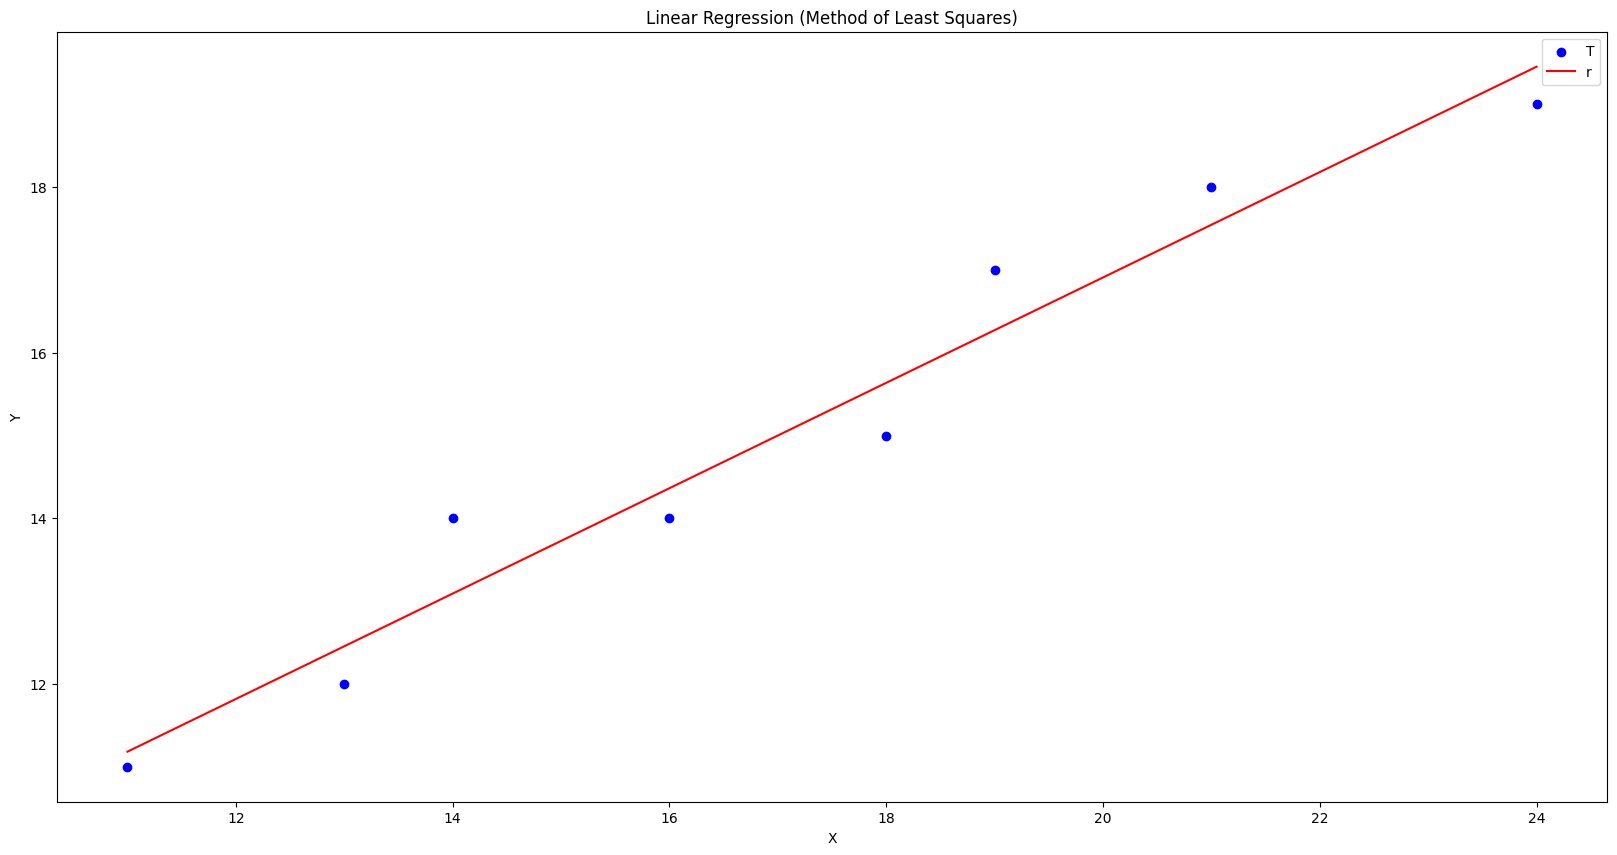

In [52]:
# plotting
plt.figure(figsize=(20, 10 ))
plt.title(  'Linear Regression (Method of Least Squares)')
plt.scatter(df3['x'], df3['y'], color='blue', label='Actual Data')
plt.plot(df3['x'], df3['Predicted Yield'], color='red', label='Regression Line')
plt.legend('True')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()